In [3]:
import requests
from tensorflow.keras.models import load_model
import pickle
import pandas as pd

In [4]:
model = load_model('model_best.hdf5')

In [5]:
with open("prep_pipe.pkl", "rb") as f:
    prep_pipe = pickle.load(f)

In [2]:
columns = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

In [3]:
data_inf = ['No', 'Yes', 'Yes' , 18, 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 24.65]

In [4]:
df_inf = pd.DataFrame([data_inf], columns=columns)
df_inf

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,No,Yes,Yes,18,Yes,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),24.65


In [11]:
preprocessing = prep_pipe.transform(df_inf)
res = model.predict(preprocessing)

1/1 [==============================] - 0s 314ms/step


In [36]:
res[0][0]

0.04874519

# Notebook for Frontend Milestone2 webapp

In [2]:
URL = "https://fadlil10-ml2p1-backend.herokuapp.com/potability"
data = {'ph':5, 
        'hardness':205, 
        'solids':12500, 
        'chloroamines':7,
        'sulfate':365,
        'conductivity': 500,
        'organic_carbon':12,
        'trihalomethanes':70,
        'turbidity':3.5}
r = requests.post(URL, json=data)
r.json()

{'code': 200,
 'result': {'classes': 'Potable', 'prediction': '1'},
 'status': 'OK'}

In [3]:
a = r.json()
a['result']['classes']

'Potable'

# Notebook for frontend Milestone 1 Phase 2 webapp

In [5]:
data = {}
for i in range(len(data_inf)):
    data[columns[i]] = data_inf[i]
data

{'SeniorCitizen': 'No',
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 18,
 'MultipleLines': 'Yes',
 'InternetService': 'No',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'No',
 'DeviceProtection': 'No',
 'TechSupport': 'No',
 'StreamingTV': 'No',
 'StreamingMovies': 'No',
 'Contract': 'Two year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Credit card (automatic)',
 'MonthlyCharges': 24.65}

In [9]:
URL = "https://telco-churn-backend-fadlil.herokuapp.com/churn"
r = requests.post(URL, json=data)
r.json()

{'code': 200, 'result': 0.07203657180070877, 'status': 'OK'}

In [10]:
r.json()['result'] < 0.5

True

In [11]:
import plotly.express as px
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})

In [9]:
df['gender'].unique().tolist()

['Female', 'Male']

In [17]:
pd.crosstab(df['gender'], df['Churn']).reset_index()['No'].tolist()

[2549, 2625]

In [18]:
pd.crosstab(df['gender'], df['Churn']).reset_index()['Yes'].tolist()

[939, 930]

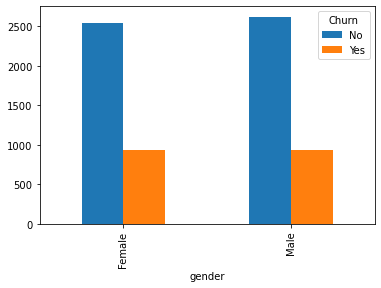

In [12]:
pd.crosstab(df['gender'], df['Churn']).plot(kind='bar')
plt.show()

In [78]:
i = 'SeniorCitizen'

In [79]:
import plotly.graph_objects as go
category=df[i].unique().tolist()
category.sort()
churn = pd.crosstab(df[i], df['Churn']).reset_index()['Yes'].tolist()
not_churn = pd.crosstab(df[i], df['Churn']).reset_index()['No'].tolist()

fig = go.Figure(data=[
    go.Bar(name='Not Churn', x=category, y=not_churn, text=not_churn, textposition='auto'),
    go.Bar(name='Churn', x=category, y=churn, text=churn, textposition='auto')
])
# Change the bar mode
fig.update_layout(yaxis_title='Number of Customers',xaxis_title=i, barmode='group',height=500,width=700, title='Customer Demographics by '+i.title()+' Columns')
fig.show()

In [73]:
category.sort()
category

['Female', 'Male']

In [80]:
cat = df.columns
cat.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [75]:
df2 = df.copy()
df2['SeniorCitizen'] = df2['SeniorCitizen'].map({1:'Yes', 0:'No'})
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
j = 'tenure'

In [117]:
df.groupby('Churn')[[j]].mean().reset_index()

,Churn,tenure
0,No,37.569965
1,Yes,17.979133


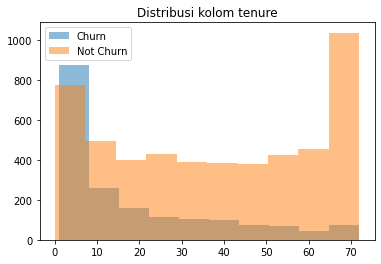

In [118]:
import numpy as np
a = df[df.Churn=='Yes'][j]
b = df[df.Churn=='No'][j]
plt.hist(a, alpha=0.5, label='Churn')
plt.hist(b, alpha=0.5, label='Not Churn')
plt.title('Distribusi kolom '+ j)
plt.legend()
plt.show()

In [121]:
buat_pie = df['Churn'].value_counts().reset_index()

In [123]:
fig11 = px.pie(buat_pie,values='Churn',names='index',title='Customer Churn & Non-Churn Percentage',hole=.4,height=500,width=500)
fig11.update_traces(textposition='outside', textinfo='percent+label')
fig11.show()